## 1 Import the dataset (Housing.csv) and look at the top five rows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Housing.csv")
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## 2 Check the shape of the DataFrame (rows, columns)

In [4]:
r,c=df.shape
print("no of rows=",r)
print("no of columns=",c)

no of rows= 545
no of columns= 13


## 3 Look at the data types of the columns

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


## 4.Check for missing  values if any, replace with appropriate values

In [10]:
if df.isnull().sum().any():  
    df.fillna(df.mean(), inplace=True)


## 5 Prepare  X (independent variables) and y (dependent variable)

In [13]:
x=df.drop(columns=['price'])
y=df['price']
print(x.head)
print(y.head)

<bound method NDFrame.head of      area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2

## 6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

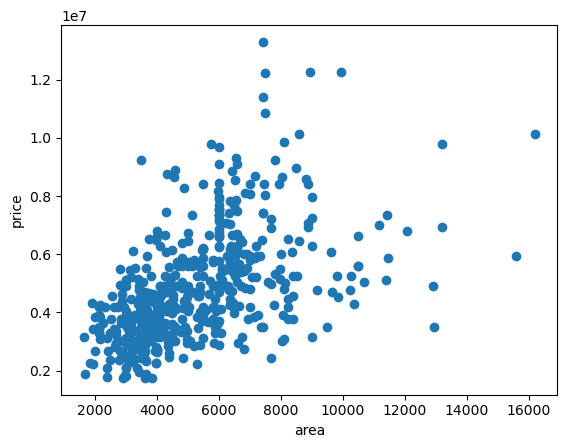

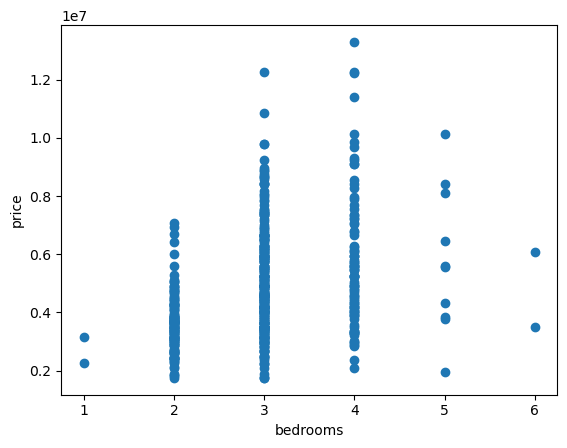

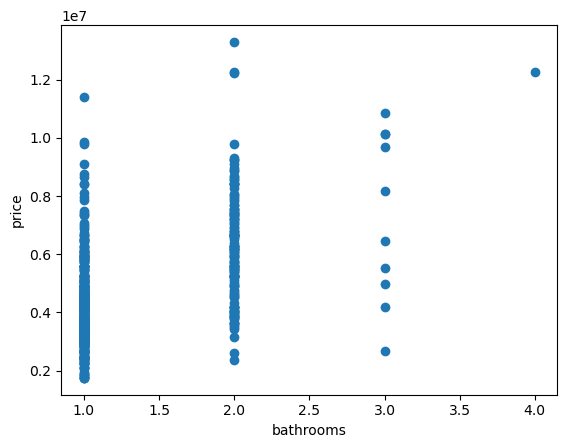

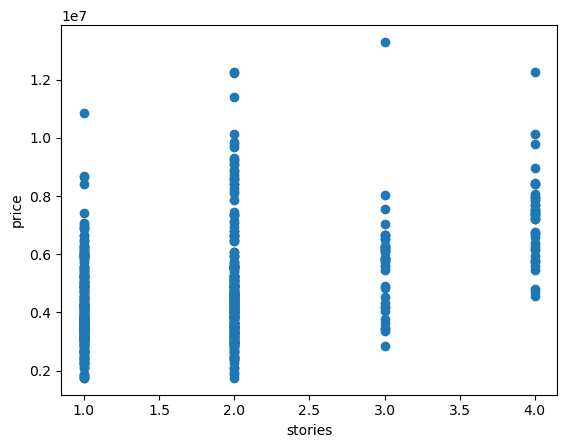

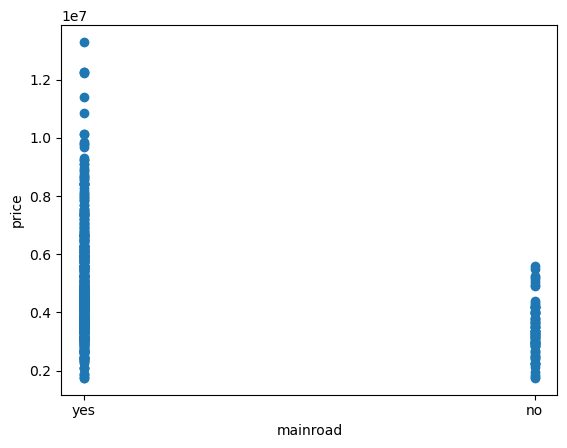

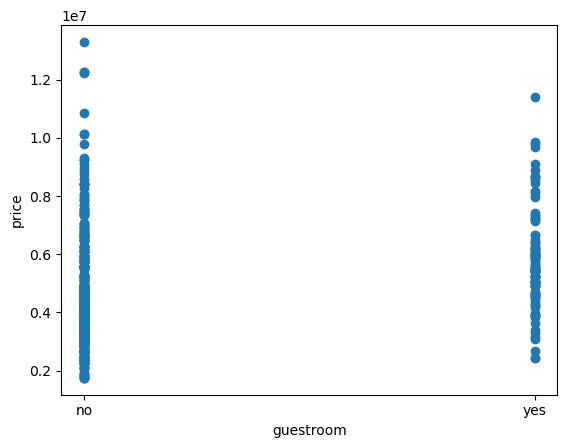

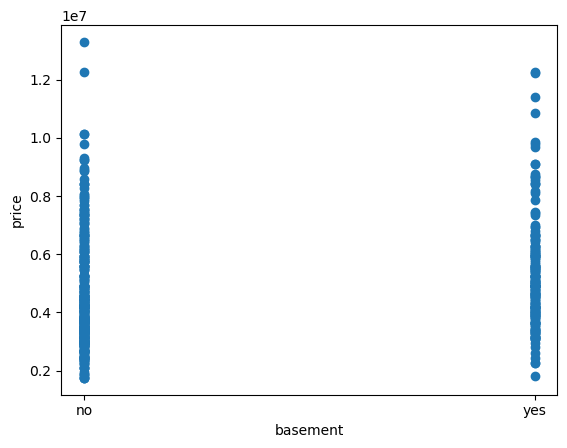

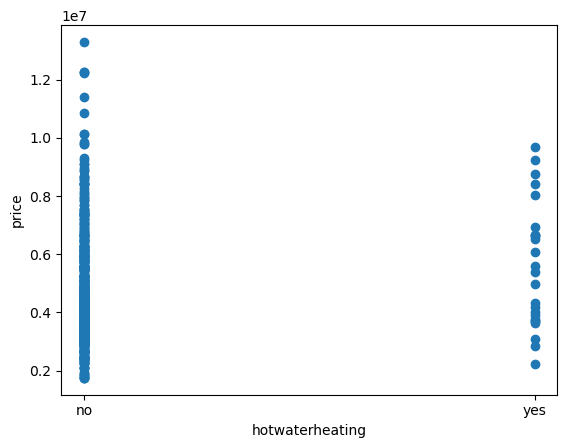

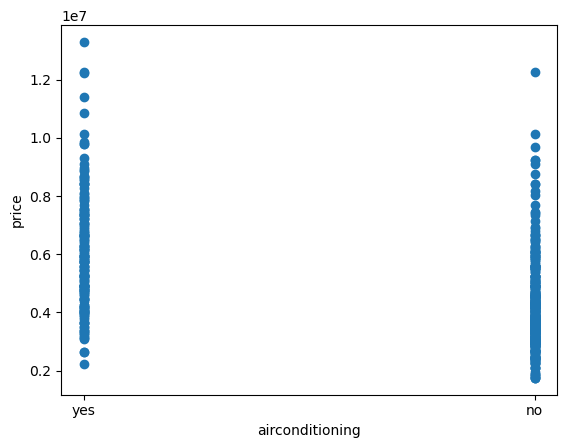

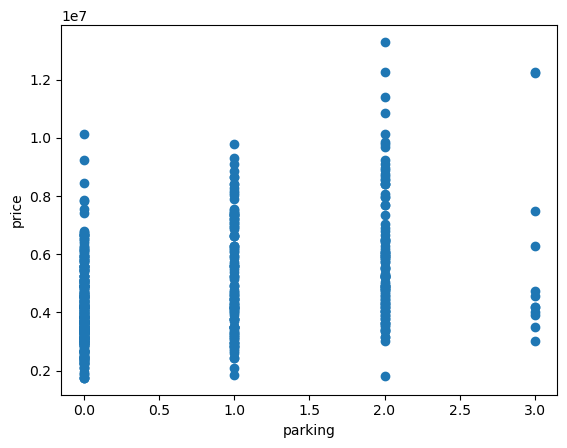

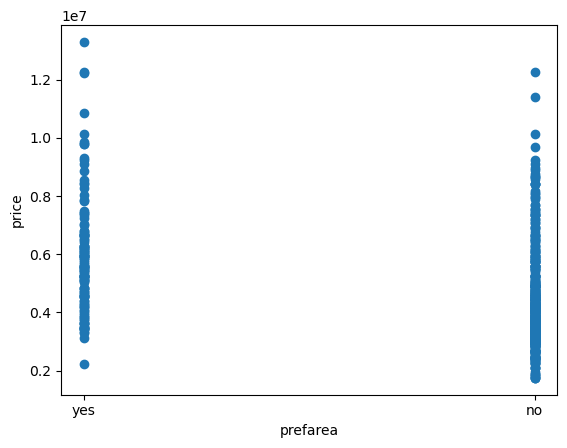

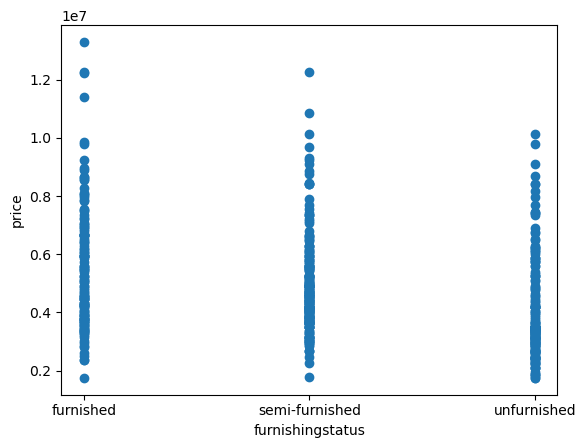

In [16]:
for column in x.columns:
 plt.scatter(df[column], df["price"])
 plt.xlabel(column)
 plt.ylabel("price")
 plt.show()


## 7. Encoding categorical data in X

In [18]:
from sklearn.preprocessing import LabelEncoder
categorical_features = x.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_features:
    x[col] = label_encoder.fit_transform(x[col])
print(x.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  


## 9 Apply feature scaling on numerical variables

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(x[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

## 10.Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## 11.Fitting Multiple Linear Regression to the Training

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 12.Predict on the train set and calculate the error = y_pred - y_train

In [31]:
y_train_pred = model.predict(X_train)
train_errors = y_train_pred - y_train


## 13.Residual plot - plot y_pred in x axis and errors in y axis

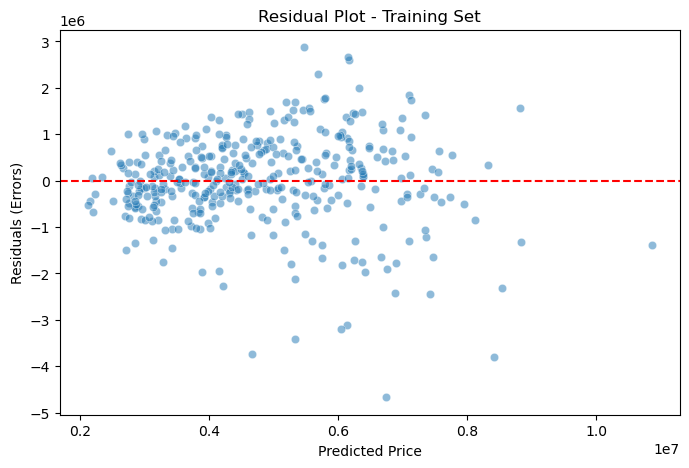

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=train_errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot - Training Set")
plt.show()


## 14.Predic on the test set

In [37]:
y_test_pred = model.predict(X_test)
test_errors = y_test_pred - y_test


## 15.Residual plot - plot y_pred in x axis and errors in y axis

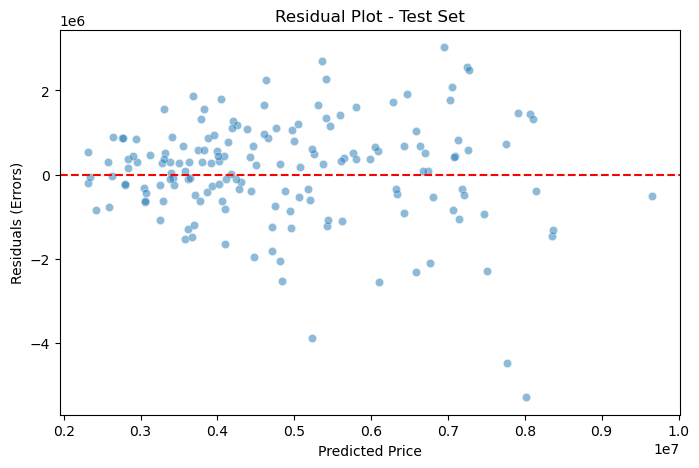

In [40]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=test_errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot - Test Set")
plt.show()


## 16.Print Mean Squared Error and R Squared Value

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error:", mse)
print("R-Squared Value:", r2)


Mean Squared Error: 1535047758428.0498
R-Squared Value: 0.6435419628959107


## 17.Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

In [46]:

def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))
n = X_test.shape[0]  
p = X_test.shape[1] 
adj_r2 = adjusted_r2(r2, n, p)

print("Adjusted R-Squared Value:", adj_r2)


Adjusted R-Squared Value: 0.615214171867771
